In [ ]:
import os
import re
import PyPDF2
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def extract_text_from_pdf(file_path):
    with open(file_path, 'rb') as file:
        pdf_reader = PyPDF2.PdfReader(file)
        text = ''
        for page in range(len(pdf_reader.pages)):
            text += pdf_reader.pages[page].extract_text()
        return text

In [ ]:
def preprocess_text(text):
    # remove numbers and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # convert to lowercase
    text = text.lower()
    return text

In [ ]:
def create_word_network(text, n_words=50):
    words = text.split()
    frequency_dict = {}
    for word in words:
        if word not in frequency_dict:
            frequency_dict[word] = 0
        frequency_dict[word] += 1
    sorted_words = sorted(frequency_dict, key=frequency_dict.get, reverse=True)
    selected_words = [word for word in sorted_words if word not in stop_words][:n_words]
    co_occurrence_matrix = {}
    for i, word1 in enumerate(selected_words):
        for j, word2 in enumerate(selected_words[i+1:]):
            if word1 not in co_occurrence_matrix:
                co_occurrence_matrix[word1] = {}
            if word2 not in co_occurrence_matrix[word1]:
                co_occurrence_matrix[word1][word2] = 0
            co_occurrence_matrix[word1][word2] += 1
    G = nx.Graph()
    for word1 in co_occurrence_matrix:
        for word2 in co_occurrence_matrix[word1]:
            G.add_edge(word1, word2, weight=co_occurrence_matrix[word1][word2])
    return G

stop_words = ["and", "the", "a", "in", "n", "to", "for", "was", "from", "were", "at", "of", "on", "no", "et", "al", "l", "3n", "1", "with", "by",
             "as", "that", "2", "after", "table","this"]

In [ ]:
pdf_folder_path = "C:/Users/naihin/Personal/Nitrogen_MA_060722/Download_pdfs/Conventional"
text = ''
for file_name in os.listdir(pdf_folder_path):
    if file_name.endswith('.pdf'):
        file_path = os.path.join(pdf_folder_path, file_name)
        text += extract_text_from_pdf(file_path)
text = preprocess_text(text)

word_network = create_word_network(text, n_words=13)
nx.draw(word_network, with_labels=True, font_weight='bold')
plt.show()

In [6]:
import os
import PyPDF2
import string
import networkx as nx
import matplotlib.pyplot as plt
# Define a color map
import matplotlib.cm as cm
#color_map = cm.get_cmap('rainbow')
# or can use different colours for nodes
import matplotlib
color_list = ['#3f704d', '#00A86B', '#c7ea46']
color_map = matplotlib.colors.ListedColormap(color_list)


In [7]:
# Define the folder containing the PDF files
folder = "C:/Users/naihin/Personal/Nitrogen_MA_060722/Download_pdfs/Organic"

In [8]:
# Read the contents of each PDF file in the folder
pdf_contents = []
for filename in os.listdir(folder):
    if filename.endswith(".pdf"):
        with open(os.path.join(folder, filename), "rb") as f:
            pdf_reader = PyPDF2.PdfReader(f)
            pdf_text = ""
            for page in range((len(pdf_reader.pages))):
                pdf_text += pdf_reader.pages[page].extract_text()
            pdf_contents.append(pdf_text)


In [9]:
# Clean up the PDF contents
exclude_words = set(["and", "the", "a", "in", "n", "to", "for", "was", "from", "were", "at", "of", "on", "no", "et", "al", "l", "3n", "1", "with", "by",
             "as", "that", "2", "after", "table","this", "be", "cycle", "3-n", "effect", "treatments", "treatment","between", "3","b","kg","is", "plots", "applied", "application" ,"not","fig",
             "j", "p", "m", "total", "than", "an", "rate", "cm", "are", "during", "or", "c", "each", "s", "study", "under", "uptake", "which", "all", "using", "use", "rates", "mg", "e",
               "higher","lower"])
for i in range(len(pdf_contents)):
    pdf_contents[i] = pdf_contents[i].lower().translate(str.maketrans("", "", string.punctuation))
    pdf_contents[i] = " ".join([word for word in pdf_contents[i].split() if word.isalpha() and word not in exclude_words]) 
    #The isalpha() method is used to check if a word is alphabetic or not. 
    #If a word is not alphabetic (i.e. it contains numbers or other characters), it will be excluded from the frequency dictionary.


In [10]:
# Create a word frequency dictionary
word_freq = {}
for content in pdf_contents:
    for word in content.split():
        if word in word_freq:
            word_freq[word] += 1
        else:
            word_freq[word] = 1

In [11]:
# Sort the words by frequency
sorted_words = sorted(word_freq.items(), key=lambda x: x[1], reverse=True)

In [30]:
n_words = 15
words = [word[0] for word in sorted_words[:n_words]]


In [31]:
# Create a Graph object
G = nx.Graph()


In [32]:
# Add nodes to the graph
for word in words:
    G.add_node(word)

In [33]:
# Add edges to the graph
for i in range(len(pdf_contents)):
    content = pdf_contents[i].split()
    for j in range(len(content) - 1):
        word1 = content[j]
        word2 = content[j + 1]
        if word1 in words and word2 in words:
            if G.has_edge(word1, word2):
                G[word1][word2]["weight"] += 1
            else:
                G.add_edge(word1, word2, weight=1)

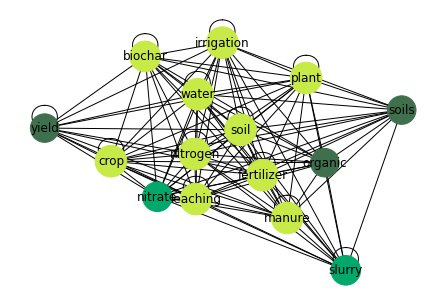

In [36]:
# Draw the graph
pos = nx.spring_layout(G)
word_freq = dict(nx.degree(G))
max_freq = max(word_freq.values())
# Scale the frequency to a suitable range for color
min_freq = min(word_freq.values())
max_freq = max(word_freq.values())
max_size =1000
min_size = 10
size_scale = max_size - min_size
# Create a list of node sizes based on frequency
node_sizes = [min_size + size_scale * word_freq[word] / max(word_freq.values()) for word in words]

# Create a list of node colors based on frequency
node_colors = [color_map(1.0 * (word_freq[word] - min_freq) / (max_freq - min_freq)) for word in words]
# Draw the graph with nodes of different sizes
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors)

plt.savefig("word_network_organic.tiff", format="tiff", dpi=300)